In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *


alpha = 0.05;
beta = gamma = delta = 0.1

X=Y=1

t_0 = 0;
t_end = 2000;

In [97]:
def make_system(alpha, beta, gamma, delta):
    """Make a system object for the welk/elves model.
    
    alpha: elk birthrate
    beta: elk deathrate
    gamma: wolf birthrate
    delta: wolf deathrate
    
    returns: System object
    """
    init = State(E=1, W=1)
    init /= np.sum(init)

    t0 = 0
    t_end = 1000

    return System(init=init, t0=t0, t_end=t_end,
                  alpha=alpha, beta=beta, gamma=gamma, delta=delta)


system = make_system(0.05, 0.1, 0.1, 0.1);

In [98]:
def update_func(state, t, system):
    """Update the Lotka Voltera model.
    
    state: State (E,W)
    t: time
    system: System object
    
    returns: State (E,W)
    """
    unpack(system)
    
#     x, y = state

#     dxdt = alpha * x - beta * x * y
#     dydt = delta * x * y - gamma * y
    
#     x += dxdt
#     y += dydt
    
    
    
#     e, w = state

#     new_elk = alpha*e
#     gone_elk = beta*e*w
#     new_wolf = delta*e*w
#     gone_wolf = gamma*w
    
    
#     e += (new_elk - gone_elk)*e
#     w += (new_wolf - gone_wolf)*w
    
    
    e, w = state

    dedt = alpha * e - beta * e * w
    dwdt = delta * e * w - gamma * w
    
    e += dedt
    w += dwdt
    
    return State(E=e, W=w)

In [99]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [100]:
def plot_results(E, W):
    """Plot the results of the Lotka Voltera model.
    
    E: TimeSeries
    W: TimeSeries

    """
    plot(E, '--', label='Elk')
    plot(W, '-', label='Wolf')
    
    decorate(xlabel='Time (days)',
             ylabel='Elk and Wolves')

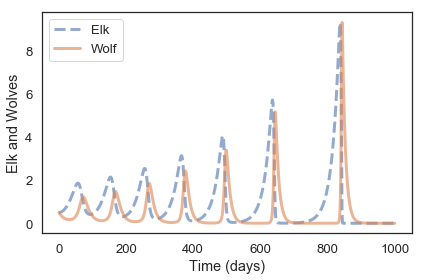

In [101]:
system = make_system(0.05, 0.1, 0.1, 0.1);
results = run_simulation(system, update_func)
plot_results(results.E, results.W)